In [1]:
import numpy as np

import pandas as pd



import warnings

warnings.filterwarnings('ignore')

In [2]:
titanic=pd.read_csv(r'/kaggle/input/titanic-dataset1/Titanic-Dataset.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Analysing which columns are completely useless in predicting the survival and deleting them Note - Don't just delete the columns because you are not finding it useful. Or focus is not on deleting the columns. Our focus is on analysing how each column is affecting the result or the prediction and in accordance with that deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values. 

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
del titanic["Name"] #Remove categorical data

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.drop(columns=["Cabin", "Ticket", "Fare"], inplace=True)

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [9]:
def getnumber(str):  #This code defines a function getnumber that maps the values of the "Sex" column in the Titanic dataset to numerical values, where "male" is mapped to 1 and other values are mapped to 2. Then, it applies this function to the "Sex" column and assigns the result to a new column named "Gender" in the Titanic dataset.

    if str=="male":  # Changing Value for "Male, Female" string values to numeric values , male=1 and female=2

        return 1

    else:

        return 2

titanic["Gender"]=titanic["Sex"].apply(getnumber)

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [10]:
del titanic["Sex"] #Deleting Sex column, since no use of it now

titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [11]:
titanic.isnull().sum() # Count of missing values

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [12]:
means=titanic[titanic.Survived==1].Age.mean() #Fill the null values of the Age column. Fill mean Survived age(mean age of the survived people) in the column where the person has survived and mean not Survived age (mean age of the people who have not survived) in the column where person has not survived

means

28.343689655172415

In [13]:
#Creating a new "Age" column , filling values in it with a condition if goes True then given values (here meanS) is put in place of last values else nothing happens, simply the values are copied from the "Age" column of the dataset

titanic["age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1 ,means,titanic["Age"])

titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [15]:
# Finding the mean age of "Not Survived" people

meanNS=titanic[titanic.Survived==0].Age.mean()

meanNS

30.62617924528302

In [16]:
#.fillna(meanNS, inplace=True): This fills the missing values in the selected column with the value specified by meanNS. The inplace=True parameter ensures that the changes are made directly to the original DataFrame

titanic.age.fillna(meanNS,inplace=True)

titanic.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [18]:
del titanic['Age']

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [19]:
# Finding the number of people who have survived 

# given that they have embarked or boarded from a particular port

survivedQ=titanic[titanic.Embarked=='Q'][titanic.Survived==1].shape[0]

survivedS=titanic[titanic.Embarked=='S'][titanic.Survived==1].shape[0]

survivedC=titanic[titanic.Embarked=='C'][titanic.Survived==1].shape[0]

print(survivedQ)

print(survivedS)

print(survivedC)

30
217
93


In [20]:
survivedQ=titanic[titanic.Embarked=='Q'][titanic.Survived==0].shape[0]

survivedS=titanic[titanic.Embarked=='S'][titanic.Survived==0].shape[0]

survivedC=titanic[titanic.Embarked=='C'][titanic.Survived==0].shape[0]

print(survivedQ)

print(survivedS)

print(survivedC)

47
427
75


#### As there are significant changes in the survival rate based on which port the passengers aboard the ship. We cannot delete the whole embarked column(It is useful). Now the Embarked column has some null values in it and hence we can safely say that deleting some rows from total rows will not affect the result. So rather than trying to fill those null values with some vales. We can simply remove them.

In [21]:
#This removes any rows from the Titanic dataset (titanic) where at least one element is missing (NaN)

titanic.dropna(inplace=True)

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [22]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [23]:
#Renaming "age" and "gender" columns

titanic.rename(columns={'age':'Age'},inplace=True)

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [24]:
titanic.rename(columns={'Gender':'Sex'},inplace=True)

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [25]:
#This will add a new column "Embark" to the Titanic dataset, containing numerical values based on the mapping defined in the getemb function.

def getemb(str):

    if str=="S":

        return 1

    elif str=="Q":

        return 2

    else:

        return 3

titanic["Embark"]=titanic["Embarked"].apply(getemb)

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [26]:
del titanic['Embarked']

titanic.rename(columns={'Embark':'Embarked'},inplace=True)

titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


In [27]:
#import matplotlib for visualization

import matplotlib.pyplot as plt

from matplotlib import style

577
312


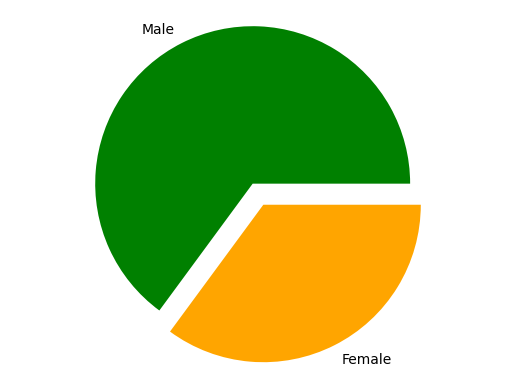

In [28]:
males=(titanic['Sex']==1).sum()

females=(titanic['Sex']==2).sum()

print(males)

print(females)

p=[males,females]

plt.pie(p,

        labels=['Male','Female'],

        colors=['green','orange'],

        explode=(0.15,0),

        startangle=0)

plt.axis('equal')

plt.show()

In [29]:
#count of survived and not survived both male & female

MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]

print(MaleS)

MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]

print(MaleN)

FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]

print(FemaleS)

FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]

print(FemaleN)

109
468
231
81


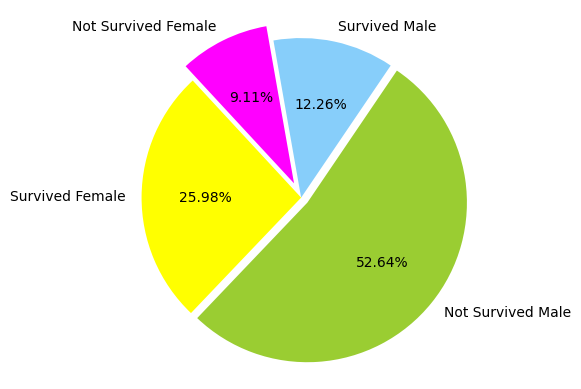

In [30]:
chart=[MaleS,MaleN,FemaleS,FemaleN]

colors=['lightskyblue','yellowgreen','yellow','magenta']

labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]

explode=[0,0.05,0,0.1]

plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")

plt.axis("equal")

plt.show()